The following MIT license only applies to the code, and not to the text and images.

# MIT License

Copyright (c) 2024 Taha Selim, Alain Chancé, MolKet

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

## A quick example of the use of the MolKet package

In [1]:
include("../molket.jl")


Load quantum gates constructor
Load Tensor module: QTensor.jl
Load quantum gates constructor
Load quantum_circuit constructor
Load quantum_circuit constructor
Load quantum gates constructor
Load Tensor module: QTensor.jl
Load quantum gates constructor
Load quantum_circuit constructor
Load quantum gates constructor
Load Tensor module: QTensor.jl
Load quantum gates constructor
Load quantum_circuit constructor
Load quantum gates constructor
Load Tensor module: QTensor.jl
Load quantum gates constructor
Load quantum_circuit constructor
Load quantum_circuit constructor
Load quantum_circuit constructor
Load quantum_circuit constructor
Load quantum_circuit constructor


In [2]:
qc = qc_init(2)
#show_statevector(qc)
op(qc, q.H, 0)
op(qc, q.H, 1)
show_statevector(qc)
peek_states(qc)


0.4999999999999999 * |00>
0.4999999999999999 * |01>
0.4999999999999999 * |10>
0.4999999999999999 * |11>


4×3 Matrix{Any}:
 "00"  0.5  0.25
 "01"  0.5  0.25
 "10"  0.5  0.25
 "11"  0.5  0.25

In [6]:
ind_qubit = 0
qc,sv_0,sv_1,p0,p1 = z_measure(qc, 0,big_endian=true)
qc.state_vector = sv_0
show_statevector(qc)
peek_states(qc)

The probability of measuring the |0> state is 0.4999999999999998
The probability of measuring the |1> state is 0.4999999999999998
0.7071067811865476 * |00>
0.0 * |01>
0.7071067811865476 * |10>
0.0 * |11>


4×3 Matrix{Any}:
 "01"  0.0       0.0
 "11"  0.0       0.0
 "00"  0.707107  0.5
 "10"  0.707107  0.5

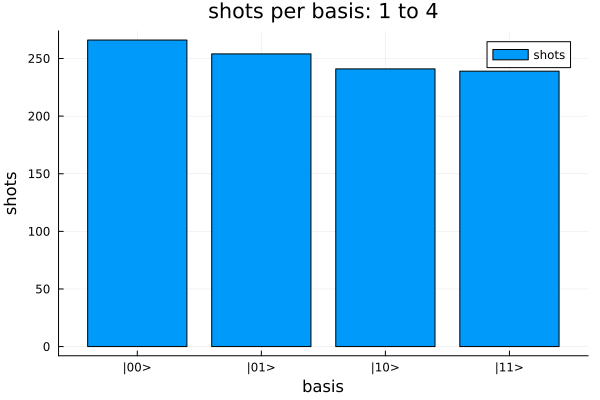

0.4999999999999999 * |00>
0.4999999999999999 * |01>
0.4999999999999999 * |10>
0.4999999999999999 * |11>


In [7]:
# Here, you can measure the states of the qubits and simulate with a given number of shots 
qc = qc_init(2,big_endian=false)
op(qc, q.H, 0)
op(qc, q.H, 1)
show_statevector(qc)
peek_states(qc)
shots = 1000
# statevector simulator
measure_state(qc,shots;save_fig=false)
# the statevector is normalized, check the probabilities of the states.
# Check for yourself that the probabilities are the same as or close to 
# ... the statevector simulator

In [21]:
q.X

2×2 Matrix{Float64}:
 0.0  1.0
 1.0  0.0

In [24]:
# apply a control-x gate
qc = qc_init(2,big_endian=false)
op(qc, q.X, 0)
op(qc, q.X, 1,q1_control=0)
show_statevector(qc)


0.0 * |00>
0.0 * |01>
0.0 * |10>
1.0 * |11>


In [34]:
# let's create a function to intialize bell pair 
function bell_pair(qc)
    op(qc, q.H, 0)
    op(qc, q.X, 1, q1_control = 0)
    return qc
end

bell_pair (generic function with 1 method)

In [35]:
# test the function 
qc = qc_init(2)
bell_pair(qc)
# show the statevector
show_statevector(qc)

0.7071067811865475 * |00>
0.0 * |01>
0.0 * |10>
0.7071067811865475 * |11>


In [36]:
# create bell pair depending on the input states of the qubits
function bell_pair_q0q1(qc,q0_state,q1_state)
    if q0_state == 1
        op(qc, q.X, 0)
    end
    if q1_state == 1
        op(qc, q.X, 1)
    end
    op(qc, q.H, 0)
    op(qc, q.X, 1, q1_control = 0)
    return qc
end

bell_pair_q0q1 (generic function with 1 method)

In [37]:
# Creating three-qubit quantum circuit state 
qc = qc_init(3)

Main.quantum_circuit.qc_initstruct(3, "big-endian", 2, 8, [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0 0.0 0.0; 0.0 0.0 1.0; … ; 1.0 1.0 0.0; 1.0 1.0 1.0], Any["000"; "001"; … ; "110"; "111";;], Any["Op_ind" "Op" … "object" "op_mat"], Bool[1 0 … 0 0; 0 1 … 0 0; … ; 0 0 … 1 0; 0 0 … 0 1], true, false, false)

In [38]:
# now let's encode information on Alice's qubit. 
# initialize the first qubit to Alice's state: assume applying X gate followed by H gate
op(qc, q.X, 0)
op(qc, q.H, 0)
# show the statevector
show_statevector(qc)

0.7071067811865475 * |000>
0.0 * |001>
0.0 * |010>
0.0 * |011>
-0.7071067811865475 * |100>
0.0 * |101>
0.0 * |110>
0.0 * |111>


In [39]:
# create a reverse bell pair between qubit 1 and qubit 2
# apply CNOT gate with qubit 0 as control and qubit 1 as target
op(qc, q.X, 1, q1_control = 0)
op(qc, q.H, 0)


Main.quantum_circuit.qc_initstruct(3, "big-endian", 2, 8, [0.4999999999999999, 0.0, -0.4999999999999999, 0.0, 0.4999999999999999, 0.0, 0.4999999999999999, 0.0], [0.0 0.0 0.0; 0.0 0.0 1.0; … ; 1.0 1.0 0.0; 1.0 1.0 1.0], Any["000"; "001"; … ; "110"; "111";;], Any["Op_ind" "Op" … "object" "op_mat"; 1 "[0.0 1.0; 1.0 0.0]" … [0.0 1.0; 1.0 0.0] [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]; … ; 3 "[0.0 1.0; 1.0 0.0]" … [0.0 1.0; 1.0 0.0] [0.7071067811865475 0.0 … 0.0 0.0; 0.0 0.7071067811865475 … 0.0 0.0; … ; -0.7071067811865475 0.0 … 0.0 0.0; 0.0 -0.7071067811865475 … 0.0 0.0]; 4 "[0.7071067811865475 0.7071067811865475; 0.7071067811865475 -0.7071067811865475]" … [0.7071067811865475 0.7071067811865475; 0.7071067811865475 -0.7071067811865475] [0.4999999999999999 0.0 … 0.4999999999999999 0.0; 0.0 0.4999999999999999 … 0.0 0.4999999999999999; … ; 0.4999999999999999 0.0 … 0.4999999999999999 0.0; 0.0 0.4999999999999999 … 0.0 0.4999999999999999]], [0.4999999999999

In [40]:
# let's show the statevector
show_statevector(qc)

0.4999999999999999 * |000>
0.0 * |001>
-0.4999999999999999 * |010>
0.0 * |011>
0.4999999999999999 * |100>
0.0 * |101>
0.4999999999999999 * |110>
0.0 * |111>


In [41]:
# Alice has to measure the outcomes of her qubits and send the results to Bob
# Based on the results, Bob will apply the necessary gates to decode the information
# Let's simulate the measurement of Alice's qubits

# apply CZ gate with qubit 0 as control and qubit 2 as target
op(qc, q.Z, 2, q1_control = 0)
# apply CX gate with qubit 1 as control and qubit 2 as target
op(qc, q.X, 2, q1_control = 1)

Main.quantum_circuit.qc_initstruct(3, "big-endian", 2, 8, [0.4999999999999999, 0.0, 0.0, -0.4999999999999999, 0.4999999999999999, 0.0, 0.0, 0.4999999999999999], [0.0 0.0 0.0; 0.0 0.0 1.0; … ; 1.0 1.0 0.0; 1.0 1.0 1.0], Any["000"; "001"; … ; "110"; "111";;], Any["Op_ind" "Op" … "object" "op_mat"; 1 "[0.0 1.0; 1.0 0.0]" … [0.0 1.0; 1.0 0.0] [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]; … ; 5 "[1.0 0.0; 0.0 -1.0]" … [1.0 0.0; 0.0 -1.0] [0.4999999999999999 0.0 … 0.4999999999999999 0.0; 0.0 0.4999999999999999 … 0.0 0.4999999999999999; … ; 0.4999999999999999 0.0 … 0.4999999999999999 0.0; 0.0 -0.4999999999999999 … 0.0 -0.4999999999999999]; 6 "[0.0 1.0; 1.0 0.0]" … [0.0 1.0; 1.0 0.0] [0.4999999999999999 0.0 … 0.4999999999999999 0.0; 0.0 0.4999999999999999 … 0.0 0.4999999999999999; … ; 0.0 -0.4999999999999999 … 0.0 -0.4999999999999999; 0.4999999999999999 0.0 … 0.4999999999999999 0.0]], [0.4999999999999999 0.0 … 0.4999999999999999 0.0; 0.0 0.4999999999999999 …

In [42]:
# show the statevector
show_statevector(qc)

0.4999999999999999 * |000>
0.0 * |001>
0.0 * |010>
-0.4999999999999999 * |011>
0.4999999999999999 * |100>
0.0 * |101>
0.0 * |110>
0.4999999999999999 * |111>


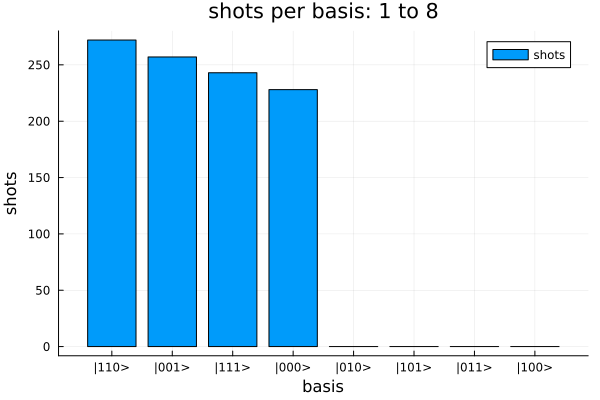

0.4999999999999999 * |000>
0.0 * |001>
0.0 * |010>
-0.4999999999999999 * |011>
0.4999999999999999 * |100>
0.0 * |101>
0.0 * |110>
0.4999999999999999 * |111>


In [43]:
# Now, let's measure 

show_statevector(qc)
peek_states(qc)
shots = 1000
# statevector simulator
measure_state(qc,shots;save_fig=false)

In [44]:
show_statevector(qc)


0.4999999999999999 * |000>
0.0 * |001>
0.0 * |010>
-0.4999999999999999 * |011>
0.4999999999999999 * |100>
0.0 * |101>
0.0 * |110>
0.4999999999999999 * |111>


In [60]:
# partial measurement function 
function measure_qubits(qc, qubits; big_endian::Bool=true, bas= "Zbas")
    # Inputs:
    # qc: quantum circuit
    # qubits: qubits to measure
    # big_endian: boolean to determine the endianess of the qubits
    # bas: basis to measure the qubits, default is Z basis
    # shots: number of shots to simulate the measurement, it is not defined at the moment.
    # Outputs:
    # qc: quantum circuit with measured qubits
    # get the number of qubits to measure
    n_qs = length(qubits)
    # get the number of qubits in the quantum circuit
    nqubits = qc.n_qubits
    for iq in 1:n_qs
        if bas == "Zbas"
            qc,sv_0,sv_1,p0,p1 = z_measure(qc, qubits[iq],big_endian=big_endian,
            show=false)
        elseif bas == "Xbas"
            qc,sv_0,sv_1,p0,p1 = x_measure(qc, qubits[iq],big_endian=big_endian,
            show=false)
        end
        # update the state vector randomly based on the measurement outcomes
        if rand() < p0
            qc.state_vector = sv_0
        else
            qc.state_vector = sv_1
        end
    end
    # get the state of the measured qubits in the computational basis 
    # First, find the non zero states of the measured qubits
    states = find_states(qc, qubits)
    return qc
end # end of the function measure_qubits        



measure_qubits (generic function with 1 method)

In [62]:
qc = qc_init(3)
# now let's encode information on Alice's qubit.
# initialize the first qubit to Alice's state: assume applying X gate followed by H gate
op(qc, q.X, 0)
op(qc, q.H, 0)
# apply H gate to qubit 1
op(qc, q.H, 1)
# apply CNOT between 1 and 2
op(qc, q.X, 2, q1_control = 1)
# apply CNOT between 0 and 1
op(qc, q.X, 1, q1_control = 0)
# apply H gate to qubit 0
op(qc, q.H, 0)
qubits = [0,1]  # qubits to measure
bas = "Zbas"     # basis to measure
measure_qubits(qc, qubits)
show_statevector(qc)

0.0 * |000>
0.0 * |001>
0.0 * |010>
0.0 * |011>
0.7071067811865475 * |100>
0.7071067811865475 * |101>
0.0 * |110>
0.0 * |111>


We notice that only the third qubit is in a superposition. So, this is the state that 
has been transferred to Bob. We can visualize that with 

```julia 
measure_state(qc,shots;save_fig=false)
```

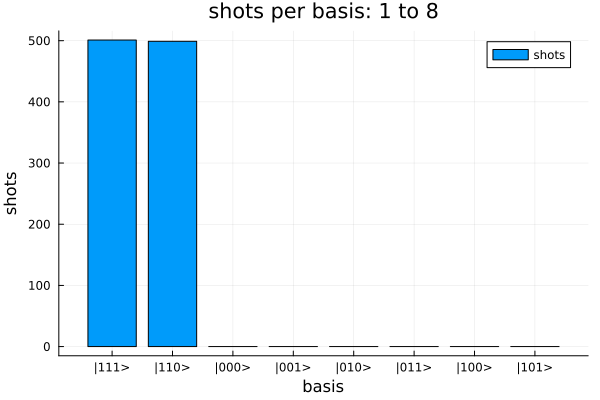

In [63]:
measure_state(qc,shots;save_fig=false)

Now, Bob has to do certain operations to get the secret message based on the measurements of Alice for her qubits.

Measurements of Alice for her qubits:

| q_0       | q_1       | Operation(s)   |
|-----------|-----------|----------------|
| 0         | 0         | Do nothing     |
| 0         | 1         | Apply Z gate   |
| 1         | 0         | Apply X gate   |
| 1         | 1         | Apply XZ gate  |


In [ ]:
# perform the decoding operations


In [73]:
function qubit_states(qc, qubits)
    # Inputs:
    # qc: quantum circuit
    # qubits: qubits to measure
    # Outputs:
    # states: states of the qubits in the computational basis
    # get the number of qubits to measure
    n_qs = length(qubits)
    # get the number of qubits in the quantum circuit
    nqubits = qc.n_qubits
    # get the state vector
    sv = qc.state_vector
    # get the number of states
    nstates = length(sv)
    # get the number of states of the measured qubits
    nstates_q = 2^n_qs
    # get the number of states of the remaining qubits
    nstates_r = nstates/nstates_q
    # get the states of the measured qubits
    states = zeros(Int,nstates_q)
    for i in 1:nstates_q
        states[i] = i-1
    end
    return states
end # end of the function find_states

qubit_states (generic function with 1 method)

In [89]:
# a function to find the states of the measured qubits with non-zero amplitudes
function find_states(qc, qubits; threshold=1e-10)
    # Inputs:
    # qc: quantum circuit
    # qubits: qubits to measure
    # threshold: threshold to consider the amplitudes
    # Outputs:
    # states: the remaining states
    # Author: Taha Selim, June 10th, 2024
    # Get the state vector
    sv = qc.state_vector
    # Get the number of states of non-zero amplitudes
    q_states, state_vector, q_bits = statevector(qc)
    ind_states = findall(x->abs(x)>threshold,sv)
    states = sv[ind_states]
    qbits = q_bits[ind_states]
    q_table = peek_states(qc)
    q_table = q_table[ind_states,:]
    # print the states as the coeff * |qbits>
    for i in 1:length(states)
        println(states[i], " * |", qbits[i], ">")
    end
    return states, q_table
end # end of the function find_states

find_states (generic function with 1 method)

In [126]:
# create a function that returns the state 0 or 1 of a qubit in the computational basis
function retr_q(qc, qubit; big_endian=true, threshold=1e-10)
    # Inputs:
    # qc: quantum circuit
    # qubit: qubit to measure
    # Outputs:
    # state: state of the measured qubit in the computational basis
    # get the state vector
    # -----------------------------------------
    # Author: Taha Selim, June 10th, 2024
    # -----------------------------------------
    sv = qc.state_vector
    # get the number of states
    nstates = length(sv)
    # get the number of states of the measured qubits with non-zero amplitudes
    states, qtable = find_states(qc, qubit; threshold=threshold)
     find_states(qc, qubit)
    big_endien::Bool = true
    if big_endien
        ind_qubit = qubit+1
    else
        ind_qubit = nqubits - qubit
    end
    #qubit_val = unique(qtable[:,1]) 
    # divid a string into characters 
    qubit_val = split(qtable[1,1], "")
    # put the strings into a table
    qtab2 = [split(qtable[i,1], "") for i in 1:length(qtable[:,1])]
    #qubit_val = [parse(Int, x) for x in qubit_val]
    # find the column index of the qubit of ind_qubit 
    qubit_val = unique([parse(Int, x[ind_qubit]) for x in qtab2])
    # print warnings of qubit_val is not one single value
    if length(qubit_val) > 1
        println("Warning: The qubit is in a superposition state
        and measured properly")
    end
    return qubit_val
end # end of the function qubit_state

retr_q (generic function with 1 method)

In [134]:
# based on the measurements of Alice's qubits, Bob will apply the necessary gates to decode the information
# create a function to decode the information
function qteleport_decode(qc, q0_state, q1_state)
    # Inputs:
    # qc: quantum circuit
    # q0_state: state of qubit 0
    # q1_state: state of qubit 1
    # Outputs:
    # qc: quantum circuit with decoded information
    # apply the necessary gates to decode the information
    if q0_state == 1
        op(qc, q.X, 2)
    end
    if q1_state == 1
        op(qc, q.Z, 2)
    end
    return qc
end # end of the function decode

qteleport_decode (generic function with 1 method)

In [136]:
qc = qc_init(3)
# now let's encode information on Alice's qubit.
# initialize the first qubit to Alice's state: assume applying X gate followed by H gate
op(qc, q.X, 0)
op(qc, q.H, 0)
# apply H gate to qubit 1
op(qc, q.H, 1)
# apply CNOT between 1 and 2
op(qc, q.X, 2, q1_control = 1)
# apply CNOT between 0 and 1
op(qc, q.X, 1, q1_control = 0)
# apply H gate to qubit 0
op(qc, q.H, 0)
qubits = [0,1]  # qubits to measure
bas = "Zbas"     # basis to measure

    n_qs = length(qubits)
    # get the number of qubits in the quantum circuit
    nqubits = qc.n_qubits
    for iq in 1:n_qs
        if bas == "Zbas"
            qc,sv_0,sv_1,p0,p1 = z_measure(qc, qubits[iq],big_endian=big_endian)
        elseif bas == "Xbas"
            qc,sv_0,sv_1,p0,p1 = x_measure(qc, qubits[iq],big_endian=big_endian)
        end
        # update the state vector randomly based on the measurement outcomes
        if rand() < p0
            qc.state_vector = sv_0
        else
            qc.state_vector = sv_1
        end
    end

# show the statevector
show_statevector(qc)

# get the state of each measured qubit in the computational basis 
q0_state = retr_q(qc, 0)
q1_state = retr_q(qc, 1)
# print the states of the measured qubits
println("The state of qubit 0 is: ", q0_state)
println("The state of qubit 1 is: ", q1_state)

# decode the information
qc = qteleport_decode(qc, q0_state, q1_state)
# show the statevector
show_statevector(qc)


The probability of measuring the |0> state is 0.4999999999999998
The probability of measuring the |1> state is 0.4999999999999998
The probability of measuring the |0> state is 0.5000000000000001
The probability of measuring the |1> state is 0.5000000000000001
0.0 * |000>
0.0 * |001>
0.0 * |010>
0.0 * |011>
0.0 * |100>
0.0 * |101>
0.7071067811865475 * |110>
0.7071067811865475 * |111>
0.7071067811865475 * |110>
0.7071067811865475 * |111>
0.7071067811865475 * |110>
0.7071067811865475 * |111>
0.7071067811865475 * |110>
0.7071067811865475 * |111>
0.7071067811865475 * |110>
0.7071067811865475 * |111>
The state of qubit 0 is: [1]
The state of qubit 1 is: [1]
0.0 * |000>
0.0 * |001>
0.0 * |010>
0.0 * |011>
0.0 * |100>
0.0 * |101>
0.7071067811865475 * |110>
0.7071067811865475 * |111>


In [125]:
 qc = qc_init(3)
# now let's encode information on Alice's qubit.
# initialize the first qubit to Alice's state: assume applying X gate followed by H gate
op(qc, q.X, 0)
op(qc, q.H, 0)
# apply H gate to qubit 1
op(qc, q.H, 1)
# apply CNOT between 1 and 2
op(qc, q.X, 2, q1_control = 1)
# apply CNOT between 0 and 1
op(qc, q.X, 1, q1_control = 0)
# apply H gate to qubit 0
op(qc, q.H, 0)
qubits = [0,1]  # qubits to measure
bas = "Zbas"     # basis to measure

    n_qs = length(qubits)
    # get the number of qubits in the quantum circuit
    nqubits = qc.n_qubits
    for iq in 1:n_qs
        if bas == "Zbas"
            qc,sv_0,sv_1,p0,p1 = z_measure(qc, qubits[iq],big_endian=big_endian)
        elseif bas == "Xbas"
            qc,sv_0,sv_1,p0,p1 = x_measure(qc, qubits[iq],big_endian=big_endian)
        end
        # update the state vector randomly based on the measurement outcomes
        if rand() < p0
            qc.state_vector = sv_0
        else
            qc.state_vector = sv_1
        end
    end

# show the statevector
show_statevector(qc)

# get the state of the measured qubits in the computational basis 
    # First, find the non zero states of the measured qubits

#states,qtable = find_states(qc, qubits)

 # Inputs:
    # qc: quantum circuit
    # qubit: qubit to measure
    # Outputs:
    # state: state of the qubit in the computational basis
    # get the state vector
    sv = qc.state_vector
    # get the number of states
    nstates = length(sv)
    # get the number of states of the measured qubits with non-zero amplitudes
    qubit = 0
    states, qtable = find_states(qc, qubit)
#qubit_0 = qubit_state(qc, 0)
# print qtable 
# obtain the value of the qubit from the states in the first column of the qtable
# qubit_val = unique first digit of the states in the first column of the qtable
big_endien::Bool = true
if big_endien
    ind_qubit = qubit+1
else
    ind_qubit = nqubits - qubit
end
#qubit_val = unique(qtable[:,1]) 
# divid a string into characters 
qubit_val = split(qtable[1,1], "")
# put the strings into a table
qtab2 = [split(qtable[i,1], "") for i in 1:length(qtable[:,1])]
#qubit_val = [parse(Int, x) for x in qubit_val]
# find the column index of the qubit of ind_qubit 
qubit_val = unique([parse(Int, x[ind_qubit]) for x in qtab2])


The probability of measuring the |0> state is 0.4999999999999998
The probability of measuring the |1> state is 0.4999999999999998
The probability of measuring the |0> state is 0.5000000000000001
The probability of measuring the |1> state is 0.5000000000000001
0.7071067811865475 * |000>
-0.7071067811865475 * |001>
0.0 * |010>
0.0 * |011>
0.0 * |100>
0.0 * |101>
0.0 * |110>
0.0 * |111>
0.7071067811865475 * |000>
-0.7071067811865475 * |001>


1-element Vector{Int64}:
 0

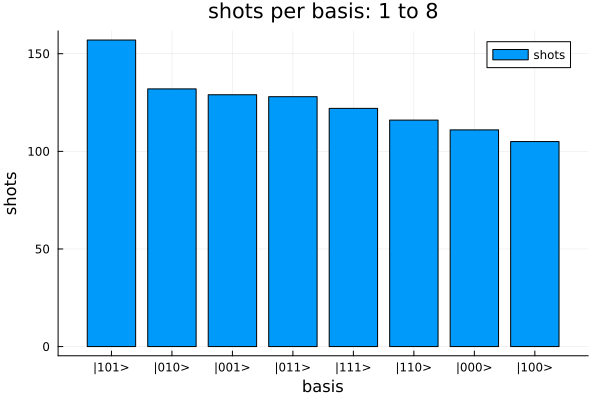

0.3535533905932737 * |000>
-0.3535533905932737 * |001>
0.3535533905932737 * |010>
-0.3535533905932737 * |011>
0.3535533905932737 * |100>
-0.3535533905932737 * |101>
-0.3535533905932737 * |110>
0.3535533905932737 * |111>


In [51]:
qc = qc_init(3)
# initialize the first qubit to Alice's state: assume applying X gate followed by H gate
op(qc, q.X, 0)
op(qc, q.H, 0)
# entangle the second and third qubits
op(qc, q.H, 1)
op(qc, q.X, 2, q1_control = 1)
# apply reverse bell pair between the first and second qubits
op(qc, q.X, 1, q1_control = 0)
op(qc, q.H, 0)
# show the statevector
#show_statevector(qc)
# measuring the first qubit
#qc,sv_0,sv_1,p0,p1 = z_measure(qc, 0,big_endian=true)
#qc.state_vector = sv_0
# apply CZ gate with qubit 0 as control and qubit 2 as target
#op(qc, q.Z, 2, q1_control = 0)
# apply CX gate with qubit 1 as control and qubit 2 as target
#op(qc, q.X, 2, q1_control = 1)

show_statevector(qc)
peek_states(qc)
shots = 1000
# statevector simulator
measure_state(qc,shots;save_fig=false)

In [ ]:
qc = qc_init(3)
# entangle 
op(qc, q.X, 0)
op(qc, q.H, 0)
# show the statevector
show_statevector(qc)

ind_qubit = 0
qc,sv_0,sv_1,p0,p1 = z_measure(qc, 0,big_endian=true)
qc.state_vector = sv_0
show_statevector(qc)
peek_states(qc)



show_statevector(qc)
peek_states(qc)
shots = 1000
# statevector simulator
measure_state(qc,shots;save_fig=false)

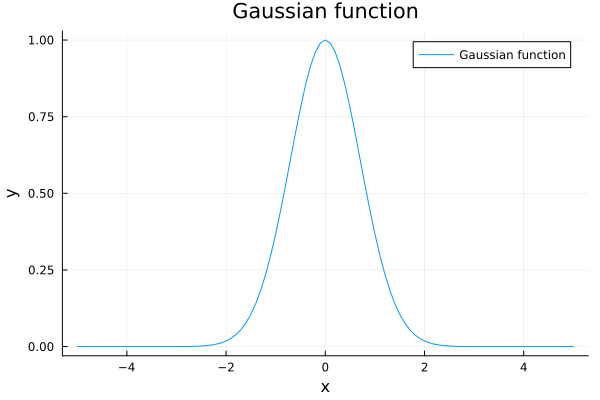

In [137]:
# write a guassian function e^-x2
function gaussian(x)
    return exp(-x^2)
end

# create a vector of x values
x = -5:0.1:5
# create a vector of y values
y = [gaussian(x) for x in x]
# plot the function
plot(x,y, label="Gaussian function", xlabel="x", ylabel="y", title="Gaussian function")

In [139]:
# calculate the expectation value of X operator
bra_psi = y' 
ket_psi = y
# create the X operator
X = 2
# calculate the expectation value
expectation = bra_psi*X*ket_psi
println("The expectation value of X operator is: ", expectation)


The expectation value of X operator is: 25.06628274631
